In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from vectorizer import get_data, get_vectors
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA


In [2]:
purchase_df, user_df = get_data()
vectors = get_vectors(user_df)

[2019-05-27 14:17:43,781] - [INFO] - [get_data] - Raw data loaded
[2019-05-27 14:17:45,087] - [INFO] - [get_data] - Data cleaned
[2019-05-27 14:17:45,105] - [INFO] - [get_vectors] - Collecting vectors
[2019-05-27 14:17:46,023] - [INFO] - [get_vectors] - Vectors ready


In [3]:
v = np.array(list(vectors.values()))

In [21]:
range_n_clusters = [2, 3, 4, 5, 6, 8, 9, 10 ]
s_list = []

In [83]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(v)
    
    silhouette_avg = silhouette_score(v, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    s_list.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.12883861633816998
For n_clusters = 3 The average silhouette_score is : 0.10901948485541411
For n_clusters = 4 The average silhouette_score is : 0.12162731928696224
For n_clusters = 5 The average silhouette_score is : 0.13595087080203036
For n_clusters = 6 The average silhouette_score is : 0.12038813998655813
For n_clusters = 8 The average silhouette_score is : 0.10028922074911296
For n_clusters = 9 The average silhouette_score is : 0.10530696507636192
For n_clusters = 10 The average silhouette_score is : 0.08911767513263566


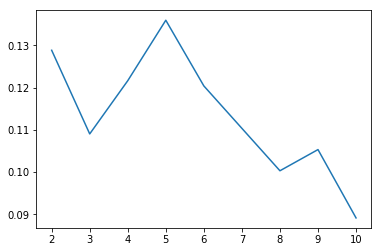

In [86]:
plt.plot(range_n_clusters, s_list)

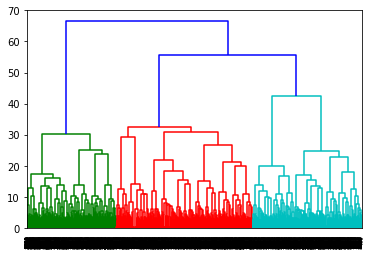

In [8]:
dendrogram = sch.dendrogram(sch.linkage(v, method='ward')) #based on the viz, 3 clusters
#ward method gives the best results 

In [22]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(v)
labels = model.labels_

In [23]:
labels

array([2, 2, 0, ..., 1, 1, 0])

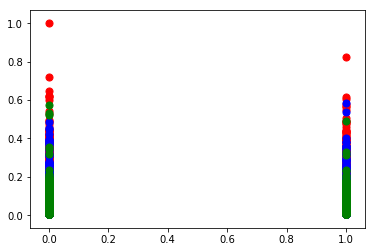

In [24]:
plt.scatter(v[labels==0, 0], v[labels==0, 1], s=50, marker='o', color='red') #just discregard this mess 
plt.scatter(v[labels==1, 0], v[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(v[labels==2, 0], v[labels==2, 1], s=50, marker='o', color='green')

In [17]:
from sklearn.manifold import TSNE
def map_tsne(vector_list, show_labels=False, labels=None):
    # WARNING: Takes as long time
    x = []
    y = []
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=5000, random_state=10)
    new = tsne_model.fit_transform(vector_list)
    for a,b in new:
        x.append(a)
        y.append(b)
        
    if show_labels:
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(labels[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
        plt.show()
    else:
        plt.plot(x, y, 'r.')
        plt.show()

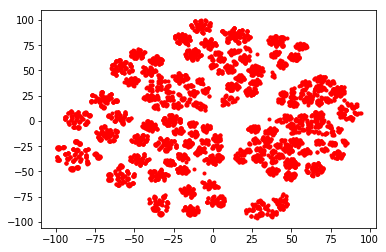

In [18]:
map_tsne(v) #tried Jon's code, but not sure what is the output and how to add colors to that... 

In [26]:
pca = PCA(n_components=2, whiten = False, random_state = 2019) #2 components for 2d 
X_pca = pca.fit_transform(v) 

In [28]:
X_pca.shape 

(5891, 2)

In [31]:
df1 = pd.DataFrame(X_pca)
df1['label'] = labels #transformed to df for plotting and added labels for reduced vectors 
df1.head(10)

,0,1,label
0,1.072502,-0.011224,2
1,-0.629126,-0.447036,2
2,-0.242262,0.739484,0
3,-0.137038,0.635246,0
4,-0.211246,0.613253,0
5,1.122620,-0.038236,1
6,-0.051710,0.592031,0
7,-0.625673,-0.250246,2
8,-0.637179,-0.158915,2
9,1.214435,0.153499,1


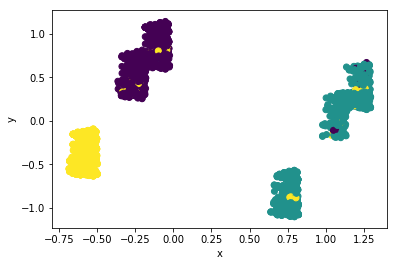

In [44]:
plt.scatter(df1[0], df1[1], c = df['label']) #plotted
plt.xlabel('x')
plt.ylabel('y')
plt.show()
